In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

kickstarter = pd.read_csv('./DSI_kickstarterscrape_dataset.csv', encoding = "ISO-8859-1")
# print(kickstarter['pledged'].mean())
for col in kickstarter.columns:
    print(col)
# print(kickstarter['backers'].max())
print(kickstarter.head())

project id
name
url
category
subcategory
location
status
goal
pledged
funded percentage
backers
funded date
levels
reward levels
updates
comments
duration
   project id                                               name  \
0       39409                              WHILE THE TREES SLEEP   
1      126581               Educational Online Trading Card Game   
2      138119                                              STRUM   
3      237090  GETTING OVER - One son's search to finally kno...   
4      246101  The Launch of FlyeGrlRoyalty &quot;The New Nam...   

                                                 url      category  \
0  http://www.kickstarter.com/projects/emiliesaba...  Film & Video   
1  http://www.kickstarter.com/projects/972789543/...         Games   
2  http://www.kickstarter.com/projects/185476022/...  Film & Video   
3  http://www.kickstarter.com/projects/charnick/g...  Film & Video   
4  http://www.kickstarter.com/projects/flyegrlroy...       Fashion   

          subca

(0, 5000)

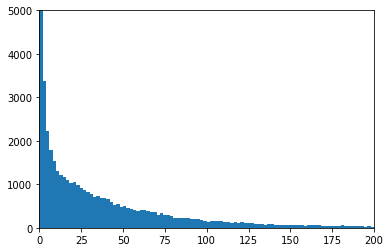

In [20]:
bin_edges = np.arange(0, kickstarter['backers'].max()+100, 2)
# ticks = np.arange(0,1500, 100)
# labels = ['{}'.format(val) for val in ticks]
plt.hist(kickstarter['backers'], bins=bin_edges);
plt.xlim((0,200))
plt.ylim((0,5000))
# plt.xticks(ticks, labels)

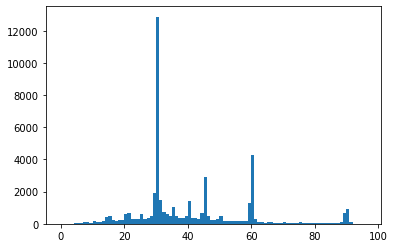

In [28]:
bin_edges = np.arange(0, kickstarter['duration'].max()+5, 1)
# ticks = np.arange(0,1500, 100)
# labels = ['{}'.format(val) for val in ticks]
plt.hist(kickstarter['duration'], bins=bin_edges);
# plt.xlim((0,200))
# plt.ylim((0,5000))


37.960474988027336
42.977828490208466


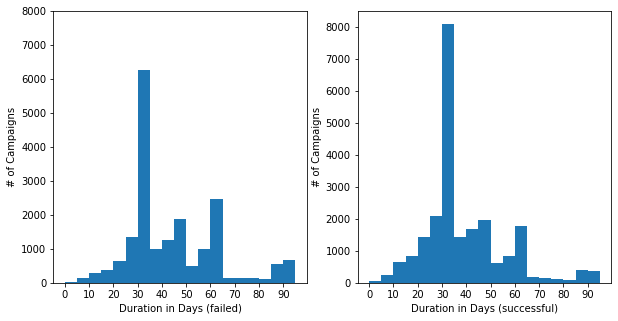

In [56]:
bin_edges = np.arange(0, kickstarter['duration'].max()+5, 5)
successful = kickstarter[kickstarter['status'] == 'successful']
failed = kickstarter[kickstarter['status'] == 'failed']
print(successful['duration'].mean())
print(failed['duration'].mean())
ticks = np.arange(0,100, 10)
yticks = np.arange(0,8100, 1000)
ylabels = ['{}'.format(val) for val in yticks]
labels = ['{}'.format(val) for val in ticks]
plt.figure(figsize = [10, 5])

plt.subplot(1,2,1)
plt.hist(failed['duration'], bins=bin_edges);
plt.xticks(ticks, labels);
plt.yticks(yticks, ylabels);
plt.xlabel('Duration in Days (failed)');
plt.ylabel('# of Campaigns');


plt.subplot(1, 2, 2)
plt.hist(successful['duration'], bins=bin_edges);
plt.xticks(ticks, labels);
plt.xlabel('Duration in Days (successful)');
plt.ylabel('# of Campaigns');
plt.yticks(yticks, ylabels);

16350.594937355234
5483.827983368888


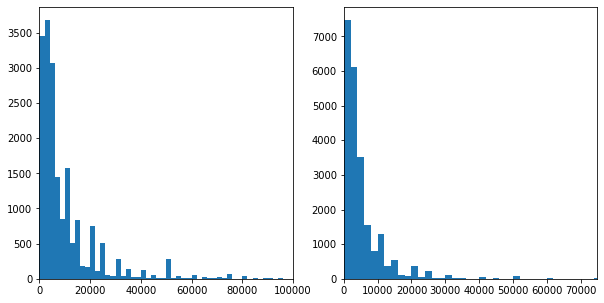

In [68]:
plt.figure(figsize = [10, 5])
bin_edges = np.arange(0, kickstarter['goal'].max()+5, 2000)
successful = kickstarter[kickstarter['status'] == 'successful']
failed = kickstarter[kickstarter['status'] == 'failed']

plt.subplot(1,2,1)
plt.hist(failed['goal'], bins=bin_edges);
plt.xlim((0,100000))
# plt.xticks(ticks, labels);
# plt.yticks(yticks, ylabels);
# plt.xlabel('Duration in Days (failed)');
# plt.ylabel('# of Campaigns');
print(failed['goal'].mean())

plt.subplot(1, 2, 2)
plt.hist(successful['goal'], bins=bin_edges);
plt.xlim((0,75000))
print(successful['goal'].mean())
# plt.xticks(ticks, labels);
# plt.xlabel('Duration in Days (successful)');
# plt.ylabel('# of Campaigns');
# plt.yticks(yticks, ylabels);

In [83]:
over_twenty = kickstarter[kickstarter['goal'] <= 10]
over_twenty = over_twenty[over_twenty['status'] != 'live']
total = over_twenty['goal'].count()
succ = over_twenty[over_twenty['status'] == 'successful']
fail = over_twenty[over_twenty['status'] == 'failed']

per_succ = succ['goal'].count() / total
per_fail = fail['goal'].count() / total
print(per_succ)
print(per_fail)

0.8333333333333334
0.16666666666666666


In [99]:
succ = kickstarter[kickstarter['status'] == 'successful']
fail = kickstarter[kickstarter['status'] == 'failed']
finished = kickstarter[kickstarter['status'] != 'live']
# succ['category'].describe()
# fail['category'].describe()
# counts = succ['category'].value_counts()
# print(counts)
# counts = fail['category'].value_counts()
# print(counts)
# plt.pie(counts[:4]);
arr = []
print(kickstarter['category'].unique())
for cat in kickstarter['category'].unique():
    tot_cat = finished[finished['category'] == cat]
    suc = tot_cat[tot_cat['status'] == 'successful']
    arr.append((cat, " - ", (suc['category'].count() / tot_cat['category'].count()) * 100 ))
    
arr.sort(reverse=True, key=lambda x: x[2])
for cat in arr:
    print(cat[0], cat[1], cat[2])

['Film & Video' 'Games' 'Fashion' 'Music' 'Art' 'Technology' 'Dance'
 'Publishing' 'Theater' 'Comics' 'Design' 'Photography' 'Food'
 'Film &amp; Video']
Dance  -  74.54031117397454
Theater  -  70.71490094745909
Music  -  67.50149075730472
Art  -  57.05770793822812
Film & Video  -  53.82932166301969
Comics  -  53.71900826446281
Film &amp; Video  -  50.7893438579181
Food  -  50.34588777863183
Photography  -  46.50324441240086
Design  -  46.433121019108285
Games  -  42.99255247122546
Publishing  -  40.12004801920768
Technology  -  39.054054054054056
Fashion  -  32.87536800785084


In [111]:
arr = []
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# jun = finished[finished['funded date'].str.contains('Jun')]
for mon in months:
    data = finished[finished['funded date'].str.contains(mon)]
    succ = data[data['status'] == 'successful']
    perc = succ['goal'].count() / data['goal'].count() * 100
    arr.append((mon, perc))
arr.sort(reverse=True, key=lambda x:x[1])
for x in arr:
    print(x[0], x[1])



Nov 57.46212121212121
Apr 57.14007023019898
Mar 56.85457337135337
Aug 54.73061760840998
Oct 54.623348803998574
Feb 54.56232601299102
Sep 54.30127041742286
Jan 53.429951690821255
May 53.207481209578745
Jun 53.093674386450054
Jul 52.98036465638148
Dec 52.28857229463474
